In [ ]:
def compound_line_plot(compound, x, x_2=None, y='resale_price', df=hdb, x_label=None):
    fig, ax = plt.subplots(figsize=(20,10))
    
    temp = df.groupby(x).mean()
    temp = temp.groupby(temp.index // compound).mean().reset_index()[[x, y]]
    temp[x] = temp[x] * compound
    temp.set_index(x).plot(ax=ax)
    
    if x_2:
        temp_2 = df.groupby(x_2).mean()
        temp_2 = temp_2.groupby(temp_2.index // compound).mean().reset_index()[[x_2, y]]
        temp_2[x_2] = temp_2[x_2] * compound
        temp_2.set_index(x_2).plot(ax=ax)
        ax.legend(['PT Transit Time, mins', 'Driving Time, mins'])
    
    if x_label == None:
        plt.xlabel(x.replace('_', ' ').title(), fontsize=12)
    else:
        plt.xlabel(x_label, fontsize=12)
        
    plt.ylabel(y.replace('_', ' ').title(), fontsize=12)
    title = y + ' vs ' + x
    plt.title(title.replace('_', ' ').title(), fontsize=15)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
compound_line_plot(5, 'raffles_place_dist', x_2="raffles_place_drive")
compound_line_plot(5, 'one_north_dist', x_2="one_north_drive")
compound_line_plot(5, 'orchard_dist', x_2="orchard_drive")
compound_line_plot(5, 'jurong_east_dist', x_2="jurong_east_drive")
compound_line_plot(5, 'changi_dist', x_2="changi_drive")

In [4]:
import matplotlib.pyplot as plt

In [ ]:
hdb = pd.read_csv('./Dataset/Transitional/final_data.csv')
mrt = pd.read_csv('./Dataset/Engineered/MRT.csv')
pri = pd.read_csv('./Dataset/Engineered/Primary_School.csv')
sec = pd.read_csv('./Dataset/Engineered/Secondary_School.csv')
spm = pd.read_csv('./Dataset/Engineered/Mall.csv')

In [ ]:
pri.loc[0:19, 'elite'] = 1
sec.loc[0:19, 'elite'] = 1

In [ ]:
# Remove terrace-house (outliers) from dataset for better mapping visualization
hdb = hdb[hdb['flat_model']!='Terrace'].reset_index(drop=True)

# Price per square feet
hdb['price_per_sqft'] = hdb['resale_price'] / hdb['floor_area_sqm'] * 10.7639

# Unit Price --- Price per area per year lease
hdb['unit_price'] = hdb['price_per_sqft'] / hdb['remaining_lease']

# Elementary Price --- Price per area per year lease per storey level
hdb['elem_price'] = hdb['unit_price'] / hdb['storey_range']

In [7]:
def compound_line_plot(compound, x, x_2=None, mode='mean', y='price_per_sqft', df=hdb, x_label=None):
    fig, ax = plt.subplots(figsize=(20,10))
    if mode == 'mean':
        temp = df.groupby(x).mean()
        temp = temp.groupby(temp.index // compound).mean().reset_index()[[x, y]]
    else:
        temp = df.groupby(x).median()
        temp = temp.groupby(temp.index // compound).median().reset_index()[[x, y]]
    temp[x] = temp[x] * compound
    temp.set_index(x).plot(ax=ax)
    
    if x_2:
        if mode == 'mean':
            temp_2 = df.groupby(x_2).mean()
            temp_2 = temp_2.groupby(temp_2.index // compound).mean().reset_index()[[x_2, y]]
        else:
            temp_2 = df.groupby(x_2).median()
            temp_2 = temp_2.groupby(temp_2.index // compound).median().reset_index()[[x_2, y]]
        temp_2[x_2] = temp_2[x_2] * compound
        temp_2.set_index(x_2).plot(ax=ax)
        ax.legend([x, x_2])
    
    if x_label == None:
        plt.xlabel(x.replace('_', ' ').title(), fontsize=12)
    else:
        plt.xlabel(x_label, fontsize=12)

    plt.ylabel(y.replace('_', ' ').title(), fontsize=12)
    title = y + ' vs ' + x
    plt.title(title.replace('_', ' ').title(), fontsize=15)
    plt.show()

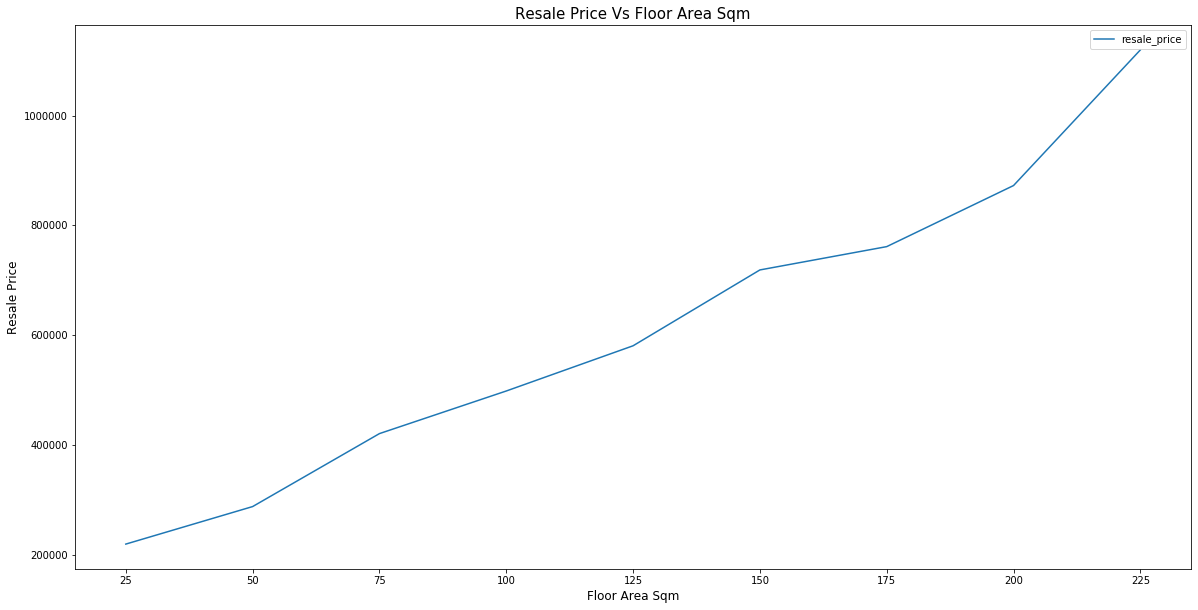

In [8]:
compound_line_plot(compound=25, x="floor_area_sqm", y="resale_price", mode='mean')

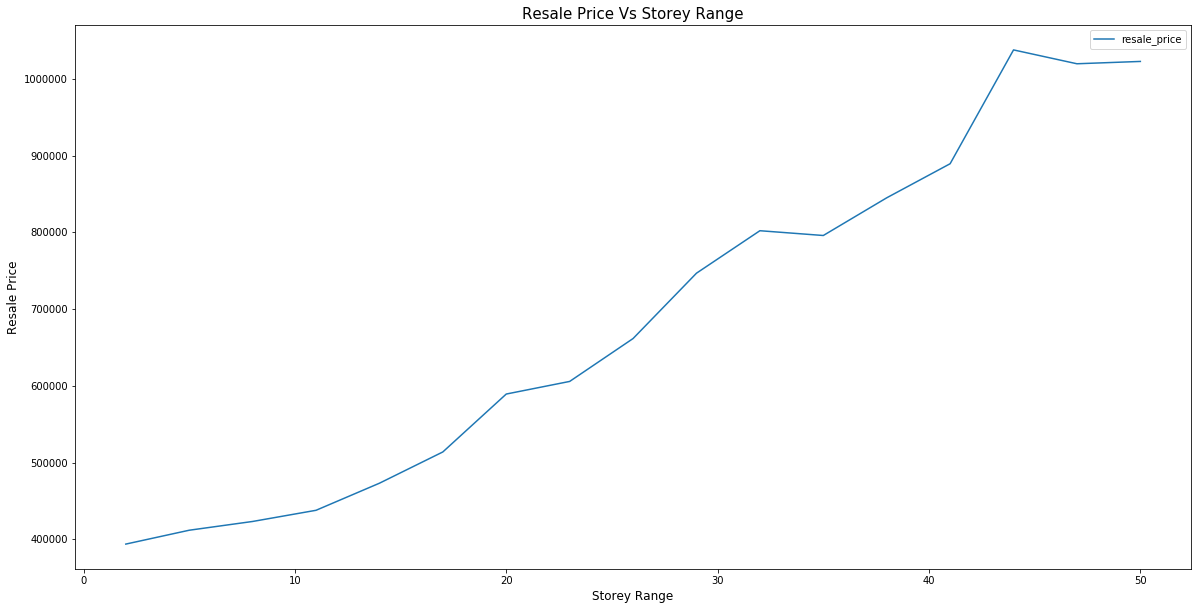

In [9]:
compound_line_plot(compound=1, x="storey_range", y="resale_price", mode='mean')

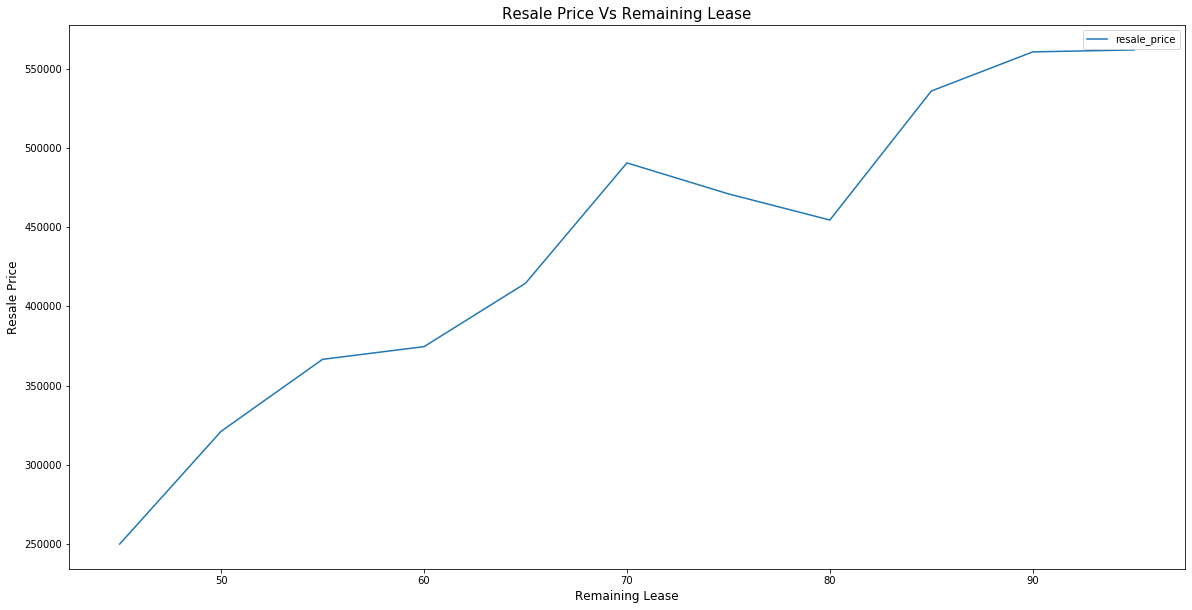

In [10]:
compound_line_plot(compound=5, x="remaining_lease", y="resale_price", mode='mean')

In [11]:
def multiplot(compound, x, x_2=None, y='price_per_sqft'):
    import math
    town_count = len(hdb['town'].unique())
    nrows = math.ceil(town_count/3)
    fig, ax = plt.subplots(figsize=(20, 5*nrows), ncols=3, nrows=nrows)
    ax = ax.flatten()
    for idx, town in enumerate(hdb['town'].unique()):
        df = hdb[hdb['town']==town]
        temp = df.groupby(x).mean()
        temp = temp.groupby(temp.index // compound).mean().reset_index()[[x, y]]
        temp[x] = temp[x] * compound
        temp = temp[temp[x].between(0, 1000, inclusive=True)]
        temp.set_index(x).plot(ax=ax[idx])
        
#         if x_2:
#             temp_2 = df.groupby(x_2).mean()
#             temp_2 = temp_2.groupby(temp_2.index // compound).mean().reset_index()[[x_2, y]]
#             temp_2[x_2] = temp_2[x_2] * compound
#             temp_2.set_index(x_2).plot(ax=ax[idx])
#             ax[idx].legend([x, x_2])
            
        ax[idx].set_xlabel('Distance in Meters')
        ax[idx].set_title(town)
        ax[idx].set_xlim(0, 1000)
    plt.tight_layout()

In [12]:
bishan = hdb[hdb['town']=='BISHAN']
bishan[bishan['dist_to_highway'].between(300, 400, inclusive=True)].address.unique()

array(['167 BISHAN ST 13', '166 BISHAN ST 13', '159 BISHAN ST 13',
       '151 BISHAN ST 11', '150 BISHAN ST 11', '155 BISHAN ST 13',
       '154 BISHAN ST 13', '150A BISHAN ST 11'], dtype=object)

In [13]:
bishan[bishan['dist_to_highway']<200].address.unique()

array(['165 BISHAN ST 13'], dtype=object)

In [14]:
bishan[bishan['address'] == '165 BISHAN ST 13'].mean()['price_per_sqft']

87.41610844689698

In [15]:
bishan[bishan['address'] == '165 BISHAN ST 13'].describe()

storey_range  floor_area_sqm  lease_commence_date  remaining_lease  \
count     10.000000       10.000000                 10.0        10.000000   
mean      13.700000      125.000000               1988.0        69.417000   
std        4.347413        5.163978                  0.0         0.979706   
min        8.000000      121.000000               1988.0        67.670000   
25%       11.000000      121.000000               1988.0        69.062500   
50%       14.000000      121.000000               1988.0        69.625000   
75%       16.250000      131.000000               1988.0        70.207500   
max       20.000000      131.000000               1988.0        70.420000   

        resale_price    sold_year  sold_month      latitude     longitude  \
count      10.000000    10.000000   10.000000  1.000000e+01  1.000000e+01   
mean   758218.800000  2017.800000    6.700000  1.349198e+00  1.038562e+02   
std     46318.852185     1.032796    3.164034  2.340556e-16  1.497956e-14   
min    640000.000000  2017.000000    1.000000  1.349198e+00  1.038562e+02   
25%    752141.000000  2017.000000    5.000000  1.349198e+00  1.038562e+02   
50%    765000.000000  2017.500000    6.500000  1.349198e+00  1.038562e+02   
75%    779500.000000  2018.000000    8.750000  1.349198e+00  1.038562e+02   
max    818000.000000  2020.000000   11.000000  1.349198e+00  1.038562e+02   

       raffles_place_dist  one_north_dist  jurong_east_dist  orchard_dist  \
count        1.000000e+01    1.000000e+01      1.000000e+01  1.000000e+01   
mean         2.755000e+01    3.242000e+01      4.628000e+01  2.352000e+01   
std          3.744889e-15    7.489778e-15      7.489778e-15  3.744889e-15   
min          2.755000e+01    3.242000e+01      4.628000e+01  2.352000e+01   
25%          2.755000e+01    3.242000e+01      4.628000e+01  2.352000e+01   
50%          2.755000e+01    3.242000e+01      4.628000e+01  2.352000e+01   
75%          2.755000e+01    3.242000e+01      4.628000e+01  2.352000e+01   
max          2.755000e+01    3.242000e+01      4.628000e+01  2.352000e+01   

        changi_dist  raffles_place_drive  one_north_drive  jurong_east_drive  \
count  1.000000e+01         1.000000e+01     1.000000e+01               10.0   
mean   4.615000e+01         1.695000e+01     2.367000e+01               27.4   
std    7.489778e-15         3.744889e-15     3.744889e-15                0.0   
min    4.615000e+01         1.695000e+01     2.367000e+01               27.4   
25%    4.615000e+01         1.695000e+01     2.367000e+01               27.4   
50%    4.615000e+01         1.695000e+01     2.367000e+01               27.4   
75%    4.615000e+01         1.695000e+01     2.367000e+01               27.4   
max    4.615000e+01         1.695000e+01     2.367000e+01               27.4   

       orchard_drive  changi_drive  mrt_dist  near_bus_itc  near_mrt_itc  \
count   1.000000e+01         10.00      10.0          10.0          10.0   
mean    1.340000e+01         30.25     799.0           0.0           0.0   
std     1.872445e-15          0.00       0.0           0.0           0.0   
min     1.340000e+01         30.25     799.0           0.0           0.0   
25%     1.340000e+01         30.25     799.0           0.0           0.0   
50%     1.340000e+01         30.25     799.0           0.0           0.0   
75%     1.340000e+01         30.25     799.0           0.0           0.0   
max     1.340000e+01         30.25     799.0           0.0           0.0   

       bus_u300m  bus_dist  mall_u1km  mall_dist  pri_u1km  pri_u2km  \
count       10.0      10.0       10.0       10.0      10.0      10.0   
mean         3.0     254.0        2.0      822.0       4.0      12.0   
std          0.0       0.0        0.0        0.0       0.0       0.0   
min          3.0     254.0        2.0      822.0       4.0      12.0   
25%          3.0     254.0        2.0      822.0       4.0      12.0   
50%          3.0     254.0        2.0      822.0       4.0      12.0   
75%          3.

In [16]:
bishan[bishan['address'] == '167 BISHAN ST 13'].mean()['price_per_sqft']

73.73425902012438

In [17]:
bishan[bishan['address'] == '167 BISHAN ST 13'].describe()

storey_range  floor_area_sqm  lease_commence_date  remaining_lease  \
count     12.000000       12.000000                 12.0        12.000000   
mean       5.000000       95.083333               1988.0        69.035000   
std        2.558409       17.106396                  0.0         1.218982   
min        2.000000       84.000000               1988.0        67.500000   
25%        2.000000       84.000000               1988.0        68.125000   
50%        5.000000       84.000000               1988.0        68.915000   
75%        8.000000      107.750000               1988.0        70.352500   
max        8.000000      122.000000               1988.0        70.670000   

        resale_price   sold_year  sold_month   latitude     longitude  \
count      12.000000    12.00000   12.000000  12.000000  1.200000e+01   
mean   488083.333333  2018.25000    5.750000   1.347252  1.038555e+02   
std    119866.181699     1.13818    3.646293   0.000000  1.484275e-14   
min    380000.000000  2017.00000    1.000000   1.347252  1.038555e+02   
25%    390000.000000  2017.00000    3.000000   1.347252  1.038555e+02   
50%    441500.000000  2018.00000    5.500000   1.347252  1.038555e+02   
75%    568500.000000  2019.00000    8.250000   1.347252  1.038555e+02   
max    710000.000000  2020.00000   12.000000   1.347252  1.038555e+02   

       raffles_place_dist  one_north_dist  jurong_east_dist  orchard_dist  \
count               12.00    1.200000e+01             12.00  1.200000e+01   
mean                26.27    3.157000e+01             45.43  2.223000e+01   
std                  0.00    3.710688e-15              0.00  7.421377e-15   
min                 26.27    3.157000e+01             45.43  2.223000e+01   
25%                 26.27    3.157000e+01             45.43  2.223000e+01   
50%                 26.27    3.157000e+01             45.43  2.223000e+01   
75%                 26.27    3.157000e+01             45.43  2.223000e+01   
max                 26.27    3.157000e+01             45.43  2.223000e+01   

        changi_dist  raffles_place_drive  one_north_drive  jurong_east_drive  \
count  1.200000e+01         1.200000e+01     1.200000e+01       1.200000e+01   
mean   4.530000e+01         1.562000e+01     2.235000e+01       2.608000e+01   
std    7.421377e-15         3.710688e-15     3.710688e-15       1.113207e-14   
min    4.530000e+01         1.562000e+01     2.235000e+01       2.608000e+01   
25%    4.530000e+01         1.562000e+01     2.235000e+01       2.608000e+01   
50%    4.530000e+01         1.562000e+01     2.235000e+01       2.608000e+01   
75%    4.530000e+01         1.562000e+01     2.235000e+01       2.608000e+01   
max    4.530000e+01         1.562000e+01     2.235000e+01       2.608000e+01   

       orchard_drive  changi_drive  mrt_dist  near_bus_itc  near_mrt_itc  \
count   1.200000e+01  1.200000e+01      12.0          12.0          12.0   
mean    1.207000e+01  2.892000e+01     877.0           0.0           0.0   
std     1.855344e-15  1.113207e-14       0.0           0.0           0.0   
min     1.207000e+01  2.892000e+01     877.0           0.0           0.0   
25%     1.207000e+01  2.892000e+01     877.0           0.0           0.0   
50%     1.207000e+01  2.892000e+01     877.0           0.0           0.0   
75%     1.207000e+01  2.892000e+01     877.0           0.0           0.0   
max     1.207000e+01  2.892000e+01     877.0           0.0           0.0   

       bus_u300m  bus_dist  mall_u1km  mall_dist  pri_u1km  pri_u2km  \
count       12.0      12.0       12.0       12.0      12.0      12.0   
mean         4.0      98.0        2.0      818.0       4.0      11.0   
std          0.0       0.0        0.0        0.0       0.0       0.0   
min          4.0      98.0        2.0      818.0       4.0      11.0   
25%          4.0      98.0        2.0      818.0       4.0      11.0   
50%          4.0      98.0        2.0      818.0       4.0      11.0   
75%          4.0      98.0        2.0      818.0   

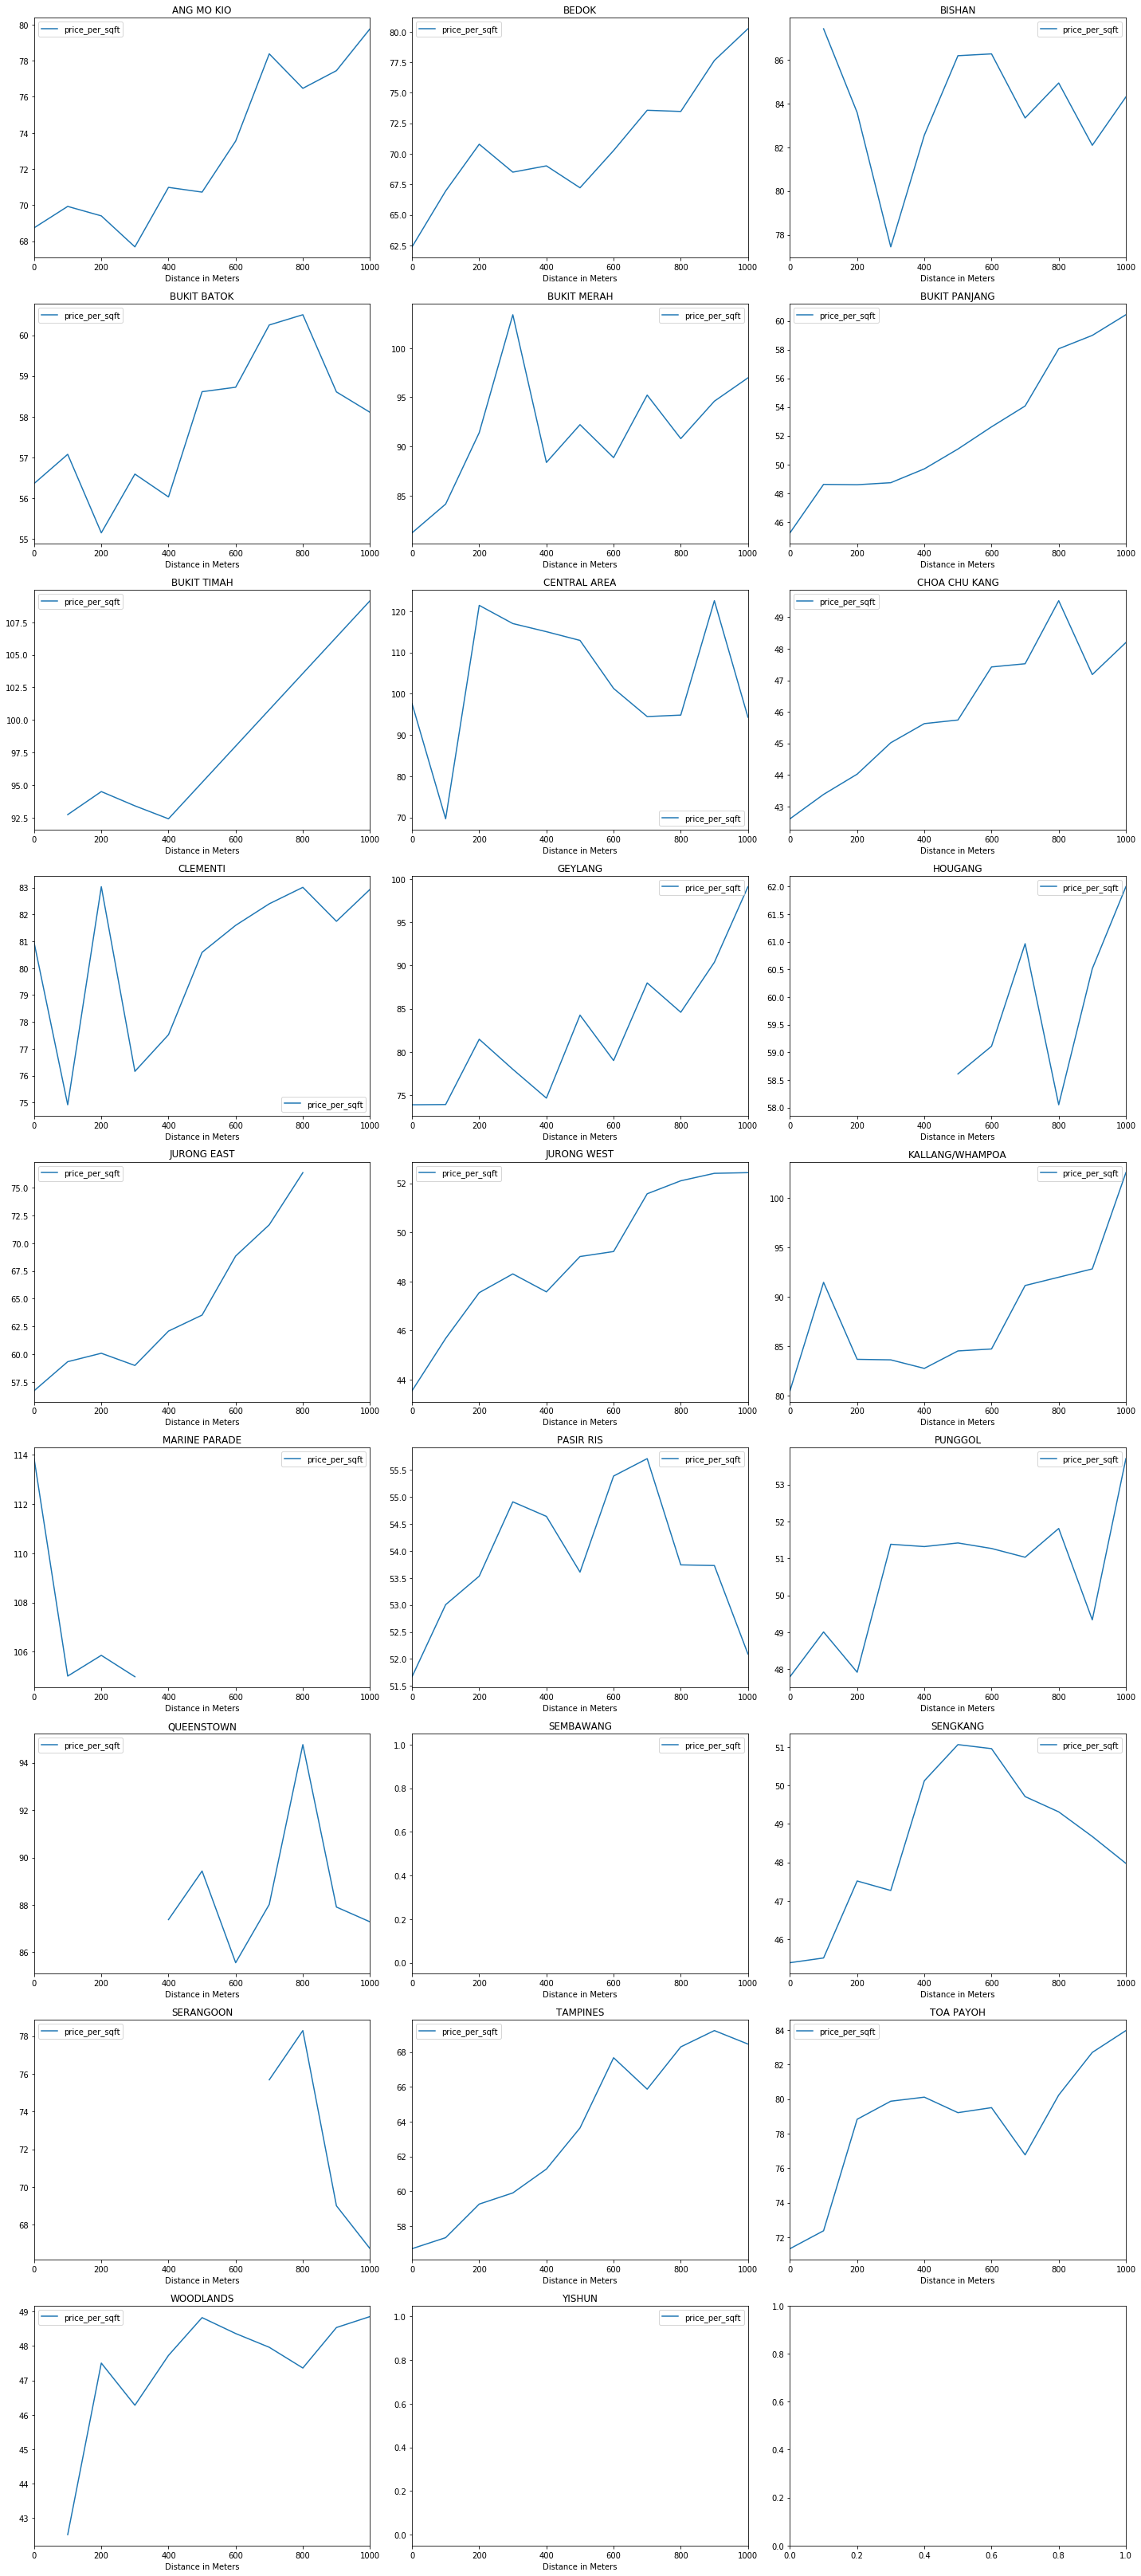

In [18]:
multiplot(compound=100, x="dist_to_highway")

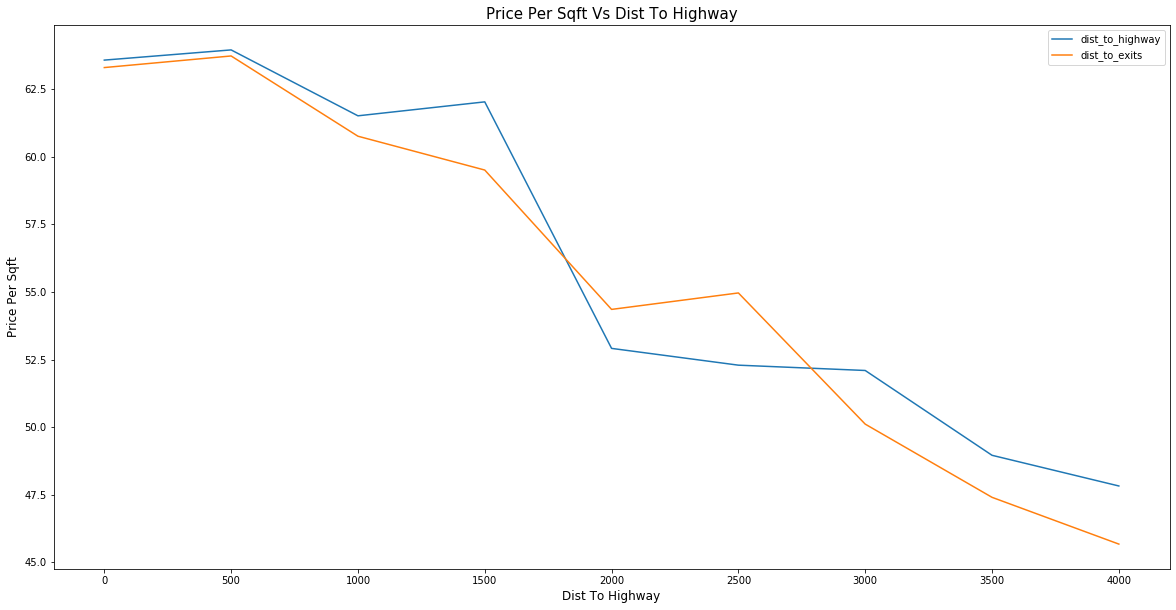

In [19]:
compound_line_plot(compound=500, x="dist_to_highway", x_2="dist_to_exits", mode='mean')

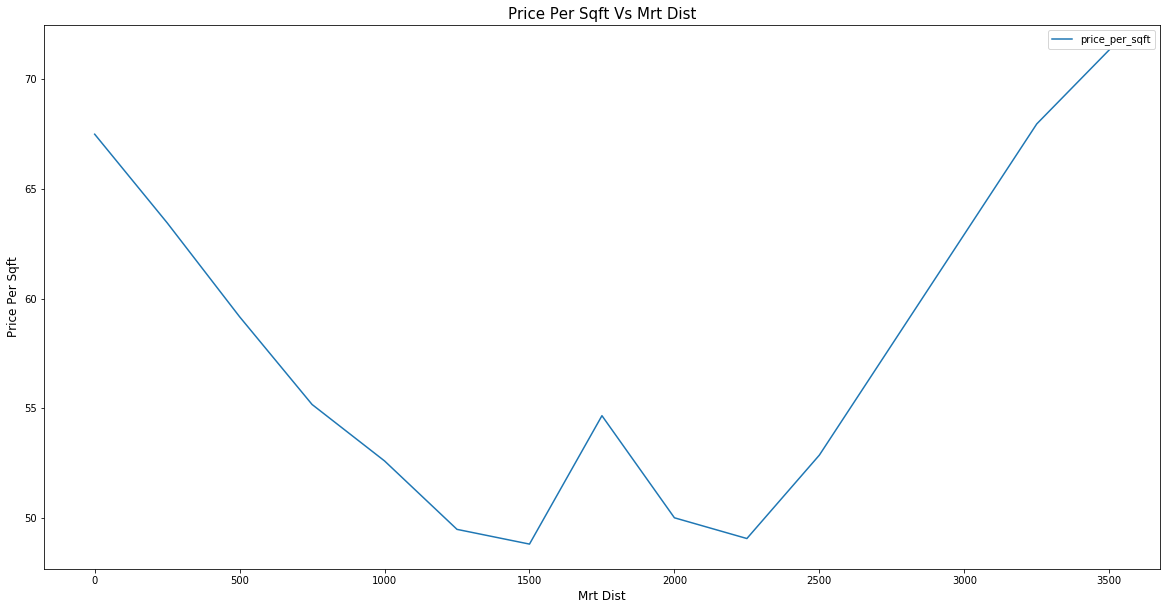

In [20]:
compound_line_plot(compound=250, x="mrt_dist", mode='median')

In [21]:
hdb[hdb["mrt_dist"].between(1750,2000, inclusive=False)]['town'].count() / hdb.shape[0] * 100

2.03697363916467

In [22]:
hdb[hdb["mrt_dist"].between(1750,2000, inclusive=False)]['town'].value_counts()

MARINE PARADE    304
SENGKANG         268
SERANGOON        251
PUNGGOL          203
HOUGANG          102
PASIR RIS        101
YISHUN            63
BISHAN            58
JURONG WEST       40
JURONG EAST       30
ANG MO KIO         8
Name: town, dtype: int64

In [23]:
def get_road_name(row):
    return ' '.join(row.split()[1:])

In [24]:
def get_mean_price_per_sqft(row, col='address'):
    return hdb[hdb[col].str.contains(row['index'])].mean()['price_per_sqft']

In [25]:
def get_town_name(row):
    return hdb[hdb['address'].str.contains(row['address'])]['town'].unique()[0]

In [26]:
outliers = hdb[hdb["mrt_dist"].between(1750,2000, inclusive=False)]['town'].value_counts()
outliers_df = pd.DataFrame(outliers).reset_index()
outliers_df['price_per_sqft'] = outliers_df.apply(get_mean_price_per_sqft, col='town', axis=1)
outliers_df.columns = ['town', 'count', 'price_per_sqft']
outliers_df

town  count  price_per_sqft
0   MARINE PARADE    304      106.262068
1        SENGKANG    268       50.298701
2       SERANGOON    251       69.762763
3         PUNGGOL    203       51.671626
4         HOUGANG    102       58.018142
5       PASIR RIS    101       53.857810
6          YISHUN     63       53.233295
7          BISHAN     58       83.281755
8     JURONG WEST     40       50.995789
9     JURONG EAST     30       60.898584
10     ANG MO KIO      8       72.074415

In [27]:
hdb[hdb["mrt_dist"]>3000]['address'].unique()

array(['5 CHANGI VILLAGE RD', '4 CHANGI VILLAGE RD',
       '1 CHANGI VILLAGE RD'], dtype=object)

In [28]:
hdb[hdb["mrt_dist"]>3000]['address'].count()

19

In [29]:
hdb[hdb["mrt_dist"]>3000]['price_per_sqft'].mean()

67.17689725566149

In [30]:
hdb[hdb['town']=='PASIR RIS']['price_per_sqft'].mean()

53.85781016341027

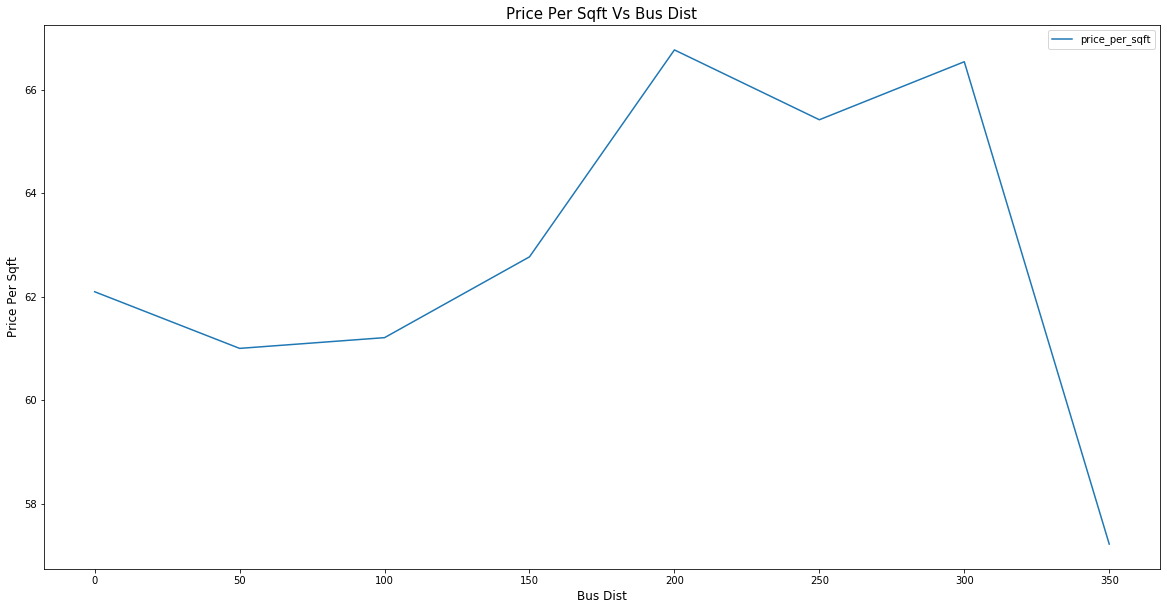

In [31]:
compound_line_plot(compound=50, x="bus_dist")

In [32]:
hdb[hdb["bus_dist"]>350]['address'].unique()

array(['765 BEDOK RESERVOIR VIEW', '18 JOO SENG RD',
       '295B COMPASSVALE CRES', '295A COMPASSVALE CRES',
       '773 BEDOK RESERVOIR VIEW', '17 JOO SENG RD'], dtype=object)

In [33]:
hdb[hdb["bus_dist"]>350]['town'].unique()

array(['BEDOK', 'TOA PAYOH', 'SENGKANG'], dtype=object)

In [34]:
outliers = hdb[hdb["bus_dist"]>=350]['address'].apply(get_road_name).value_counts()
outliers_df = pd.DataFrame(outliers).reset_index()
outliers_df['price_per_sqft'] = outliers_df.apply(get_mean_price_per_sqft, axis=1)
outliers_df.columns = ['address', 'count', 'price_per_sqft']
outliers_df['town'] = outliers_df.apply(get_town_name, axis=1)
outliers_df[['town', 'address', 'count', 'price_per_sqft']]

town               address  count  price_per_sqft
0      BEDOK  BEDOK RESERVOIR VIEW     47       61.854376
1   SENGKANG      COMPASSVALE CRES     29       45.597899
2  TOA PAYOH           JOO SENG RD     10       66.144098

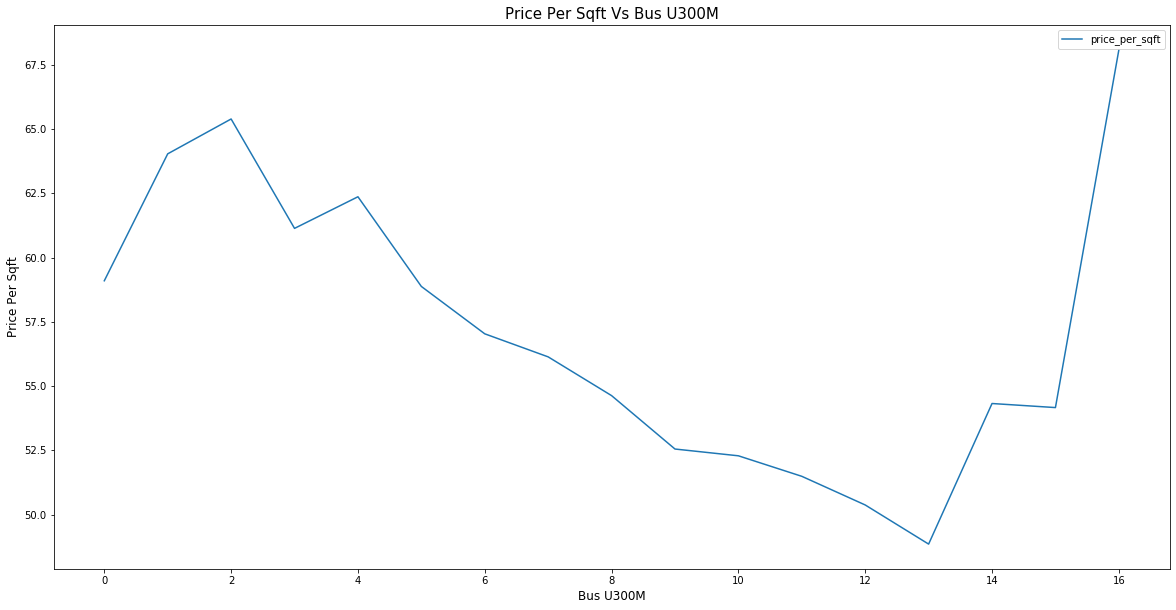

In [35]:
compound_line_plot(compound=1, x="bus_u300m", mode='median')

In [36]:
hdb[hdb["bus_u300m"]==16]['town'].unique()

array(['BUKIT PANJANG'], dtype=object)

In [37]:
hdb[hdb["bus_u300m"]>13]['town'].value_counts()

BUKIT PANJANG    77
SEMBAWANG        28
JURONG WEST      17
CHOA CHU KANG     5
PASIR RIS         3
Name: town, dtype: int64

In [38]:
hdb.groupby('bus_u300m').mean()[['mrt_dist', 'price_per_sqft']]

mrt_dist  price_per_sqft
bus_u300m                            
0.0        736.366848       63.123011
1.0        758.540645       65.416760
2.0        815.256715       66.693093
3.0        890.211332       64.697372
4.0        817.486616       64.694575
5.0        812.194338       63.254776
6.0        766.652157       61.284317
7.0        731.106950       61.124650
8.0        737.313322       58.647168
9.0        726.673525       57.387860
10.0       654.121534       55.707648
11.0       674.573519       55.321077
12.0       696.803922       52.187992
13.0       500.510288       53.613998
14.0       373.472973       57.332473
15.0       210.531250       57.855933
16.0       112.958333       69.189934

In [39]:
correlation = hdb.groupby('bus_u300m').mean()

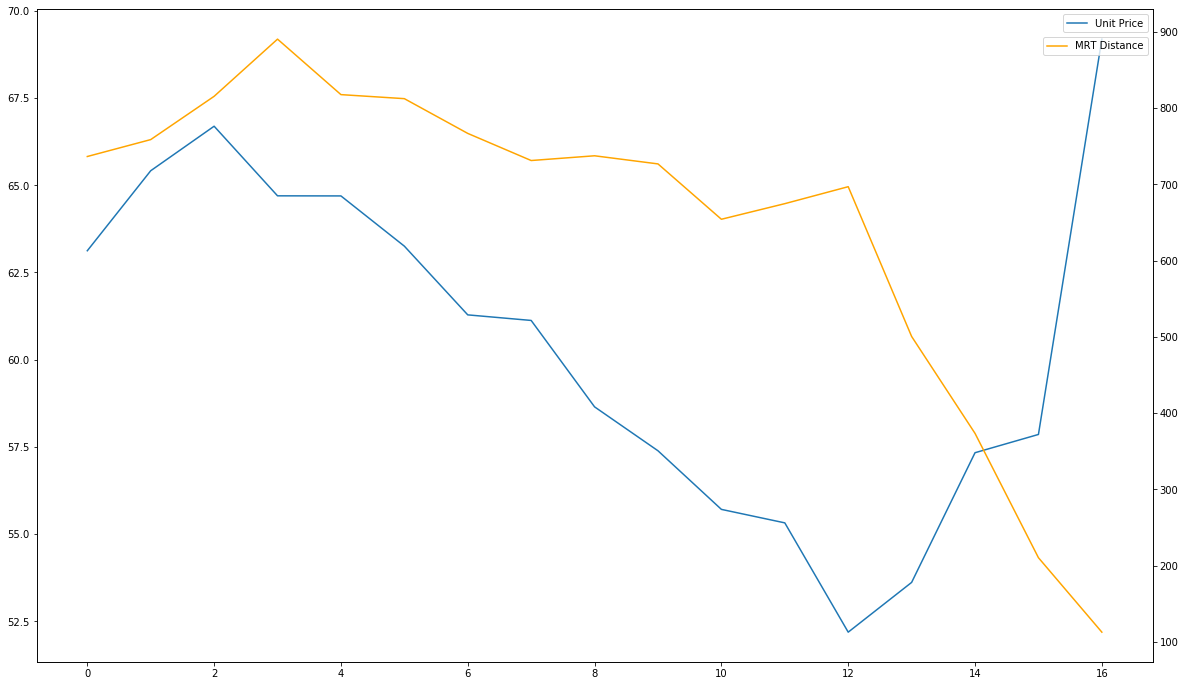

In [40]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(correlation['price_per_sqft'], label='Unit Price')
ax.legend()
ax2 = ax.twinx()
ax2.plot(correlation['mrt_dist'], color='orange', label='MRT Distance')
ax2.legend(loc=(0.902,0.93))
plt.show()

In [41]:
outliers = hdb[hdb["bus_u300m"]>13]['address'].apply(get_road_name).value_counts()
outliers_df = pd.DataFrame(outliers).reset_index()
outliers_df['price_per_sqft'] = outliers_df.apply(get_mean_price_per_sqft, axis=1)
outliers_df.columns = ['address', 'count', 'price_per_sqft']
outliers_df['town'] = outliers_df.apply(get_town_name, axis=1)
outliers_df[['town', 'address', 'count', 'price_per_sqft']]

town              address  count  price_per_sqft
0  BUKIT PANJANG            JELEBU RD     58       68.809039
1      SEMBAWANG         ADMIRALTY DR     27       43.701567
2  BUKIT PANJANG           LOMPANG RD     19       62.556604
3    JURONG WEST    JURONG WEST ST 61     14       50.377273
4  CHOA CHU KANG  CHOA CHU KANG AVE 2      4       43.182374
5    JURONG WEST    JURONG WEST ST 71      3       45.320867
6      PASIR RIS      PASIR RIS ST 21      3       50.348338
7      SEMBAWANG        SEMBAWANG WAY      1       47.239769
8  CHOA CHU KANG  CHOA CHU KANG AVE 5      1       43.711142

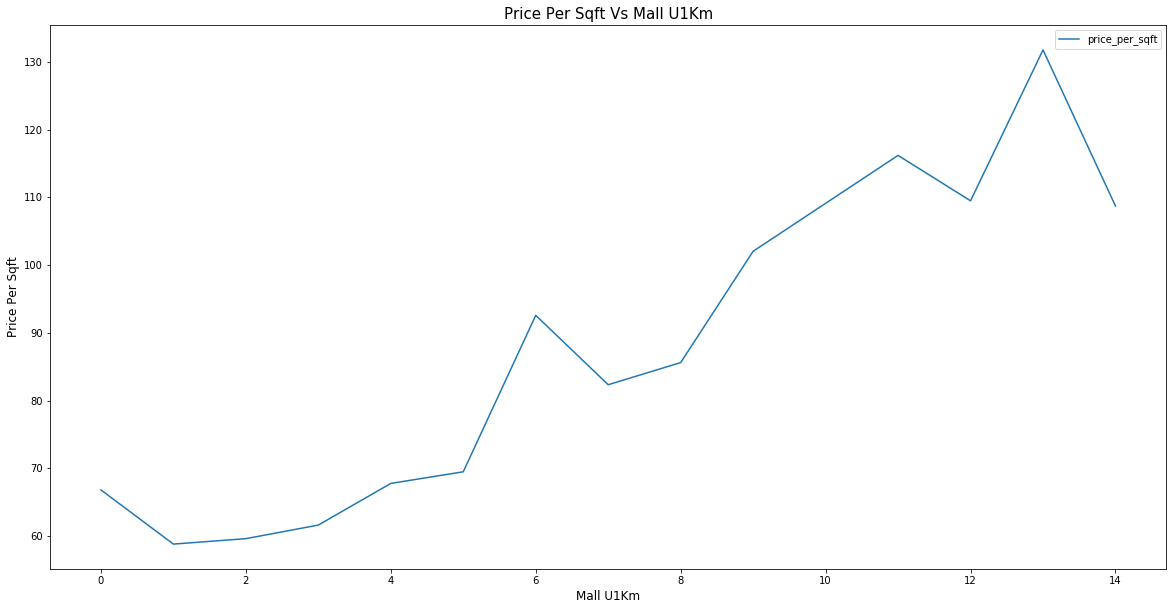

In [42]:
compound_line_plot(compound=1, x="mall_u1km")

In [43]:
hdb[hdb['mall_u1km']==13].address.unique()

array(['232 BAIN ST', '233 BAIN ST'], dtype=object)

In [44]:
hdb[hdb['mall_u1km']==14].address.unique()

array(['264 WATERLOO ST', '263 WATERLOO ST', '262 WATERLOO ST'],
      dtype=object)

In [45]:
def multiplot(compound, x, y='price_per_sqft'):
    import math
    town_count = len(hdb['town'].unique())
    nrows = math.ceil(town_count/3)
    fig, ax = plt.subplots(figsize=(20, 5*nrows), ncols=3, nrows=nrows)
    ax = ax.flatten()
    for idx, town in enumerate(hdb['town'].unique()):
        df = hdb[hdb['town']==town]
        temp = df.groupby(x).mean()
        temp = temp.groupby(temp.index // compound).mean().reset_index()[[x, y]]
        temp[x] = temp[x] * compound
        temp.set_index(x).plot(ax=ax[idx])            
        ax[idx].set_xlabel('Distance in Meters')
        ax[idx].set_title(town)
    plt.tight_layout()

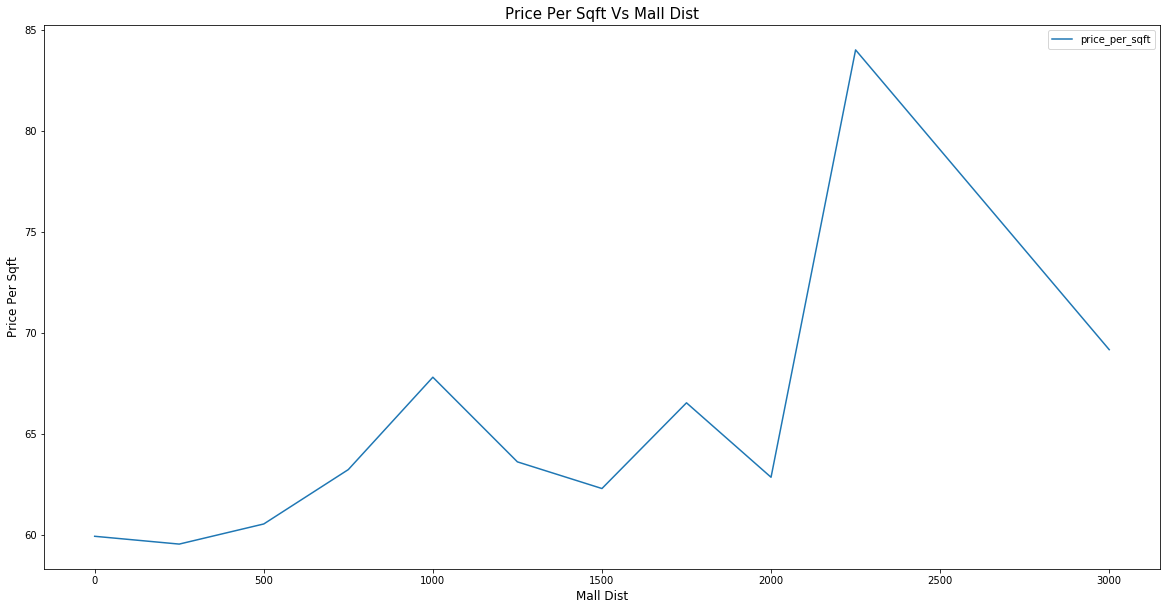

In [46]:
compound_line_plot(compound=250, x="mall_dist")

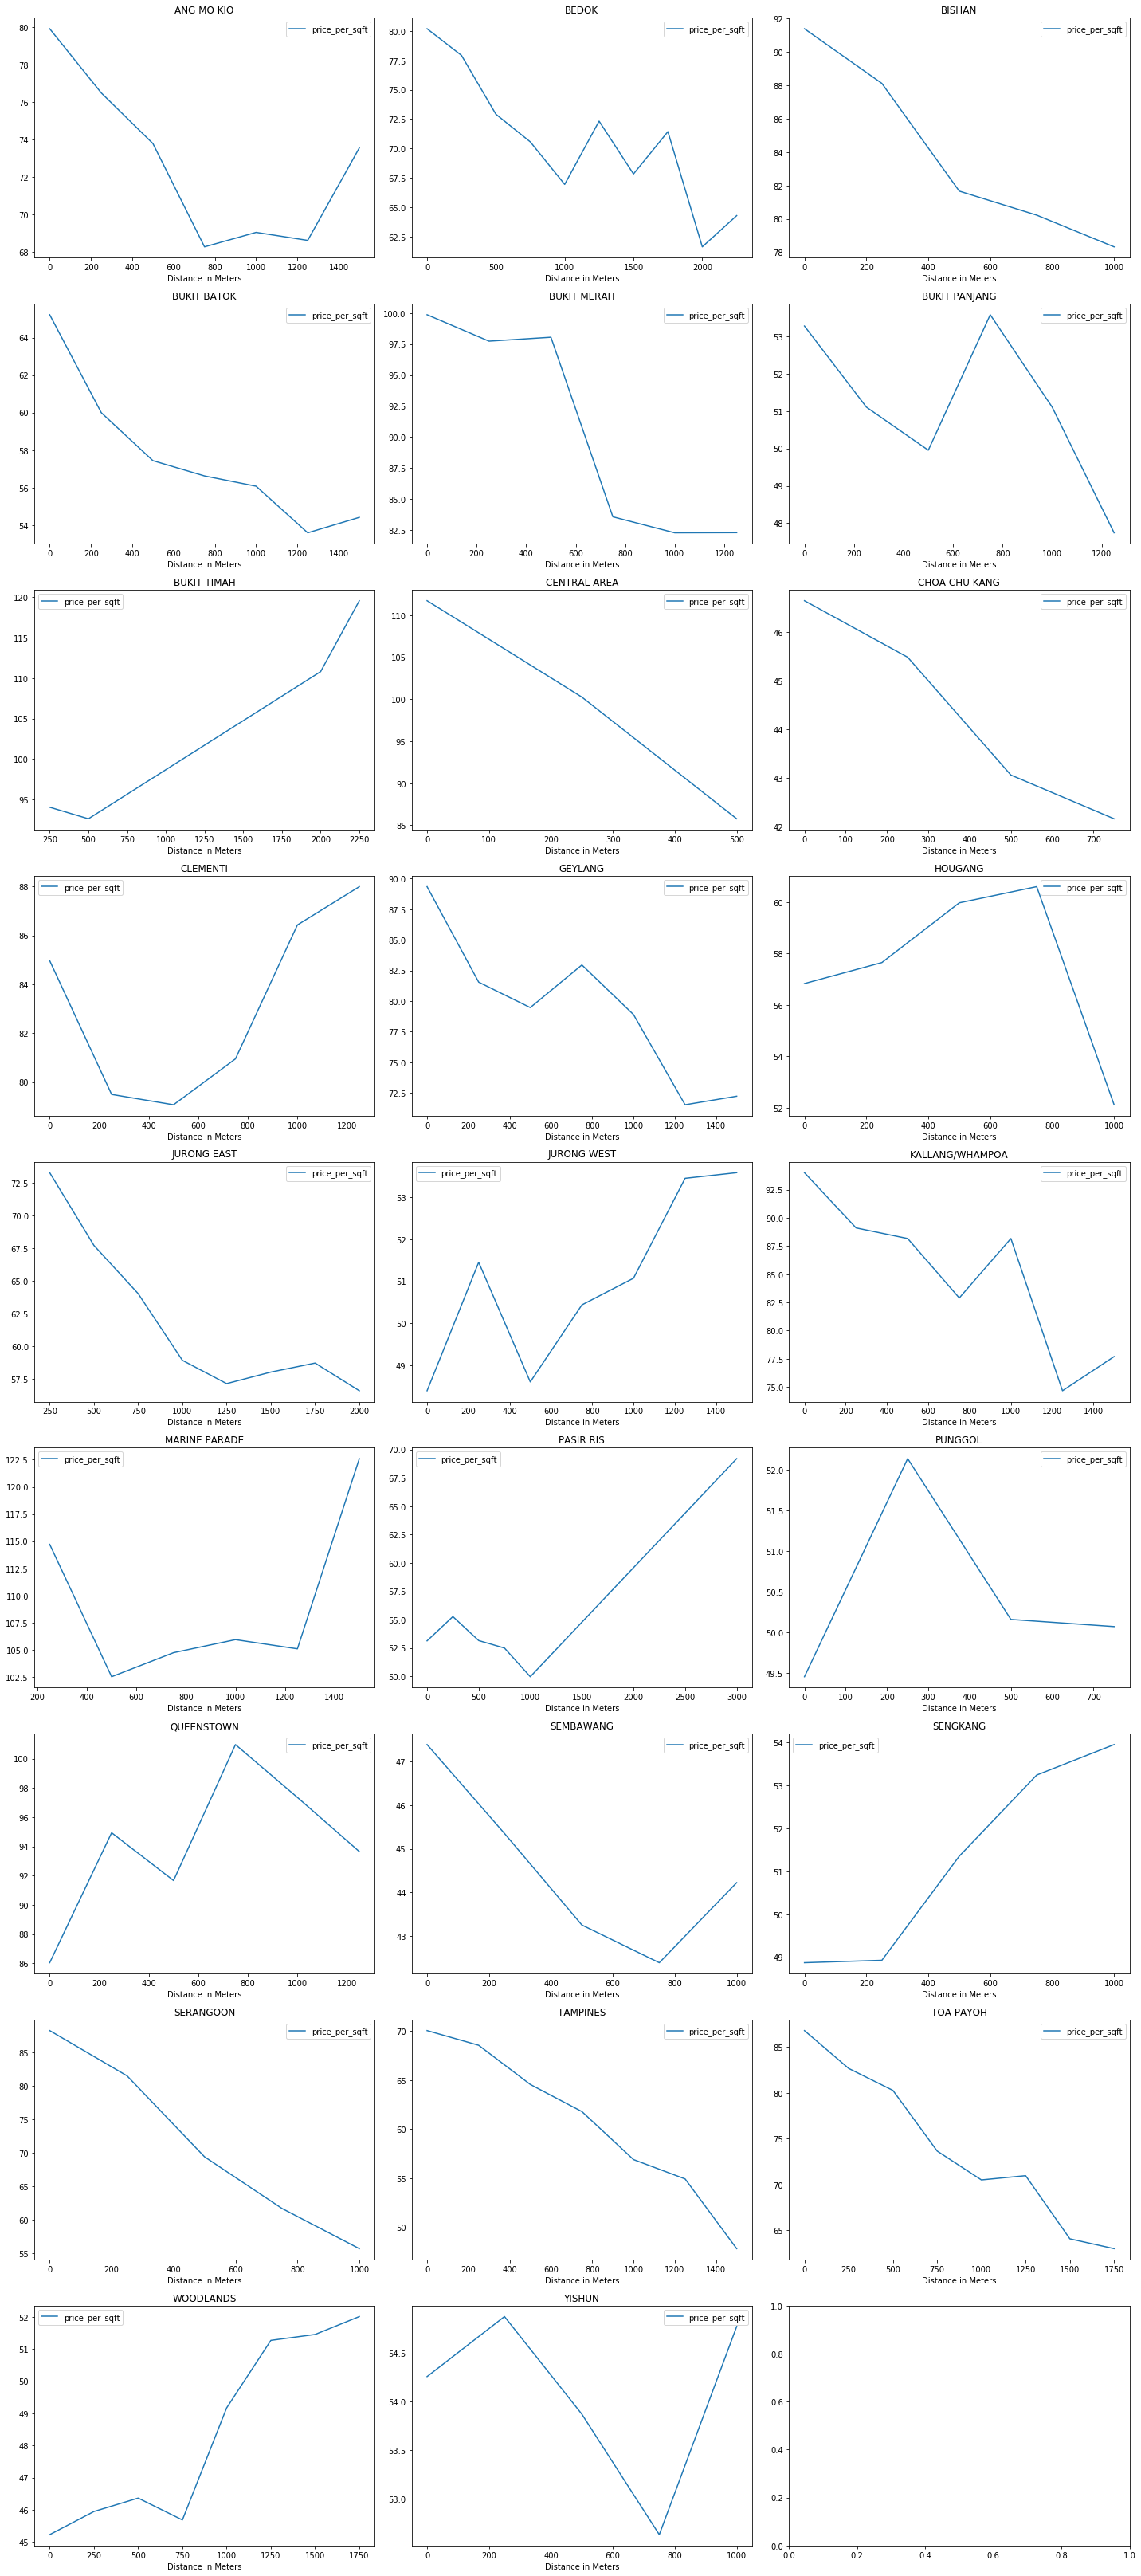

In [47]:
multiplot(compound=250, x='mall_dist')

In [48]:
outliers = hdb[hdb["mall_dist"].between(2250,2500, inclusive=False)]['town'].value_counts()
outliers_df = pd.DataFrame(outliers).reset_index()
outliers_df['price_per_sqft'] = outliers_df.apply(get_mean_price_per_sqft, col='town', axis=1)
outliers_df.columns = ['town', 'count', 'price_per_sqft']
outliers_df

town  count  price_per_sqft
0  BUKIT TIMAH     48      100.379486
1        BEDOK     41       70.529769

In [49]:
outliers = hdb[hdb["mall_dist"].between(1000,1250, inclusive=False)]['town'].value_counts()
outliers_df = pd.DataFrame(outliers).reset_index()
outliers_df['price_per_sqft'] = outliers_df.apply(get_mean_price_per_sqft, col='town', axis=1)
outliers_df.columns = ['town', 'count', 'price_per_sqft']
outliers_df.head()

town  count  price_per_sqft
0  KALLANG/WHAMPOA    839       83.358574
1         TAMPINES    756       63.081407
2      BUKIT MERAH    647       89.213194
3      BUKIT BATOK    530       56.732036
4          GEYLANG    530       79.457975

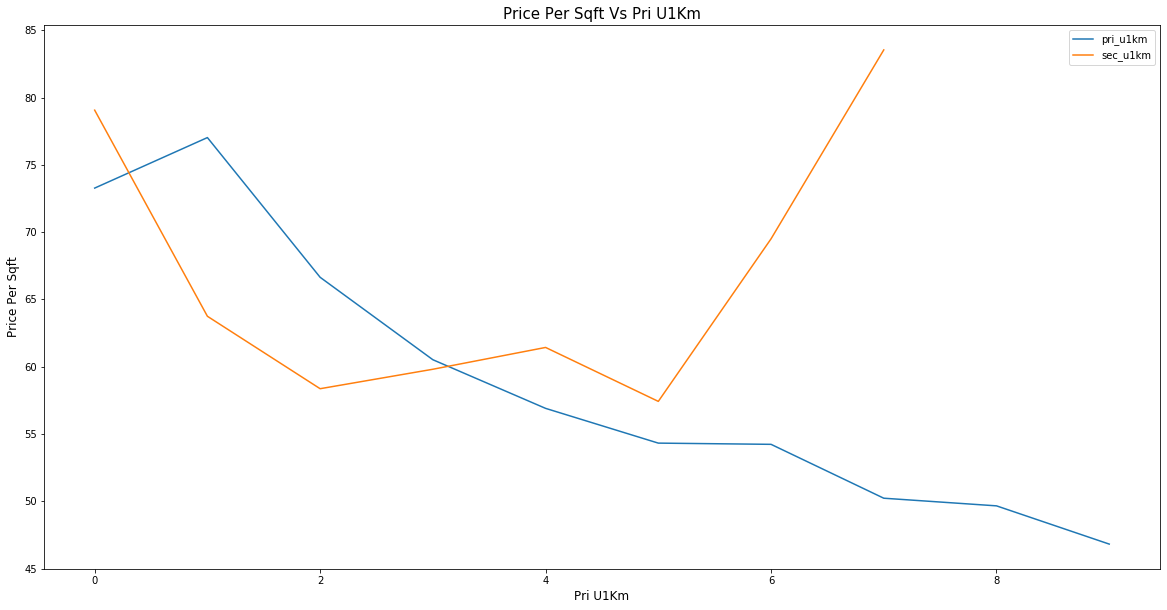

In [50]:
compound_line_plot(compound=1, x="pri_u1km", x_2="sec_u1km")

In [51]:
hdb[hdb["sec_u1km"]==7]['town'].value_counts()

BISHAN    5
Name: town, dtype: int64

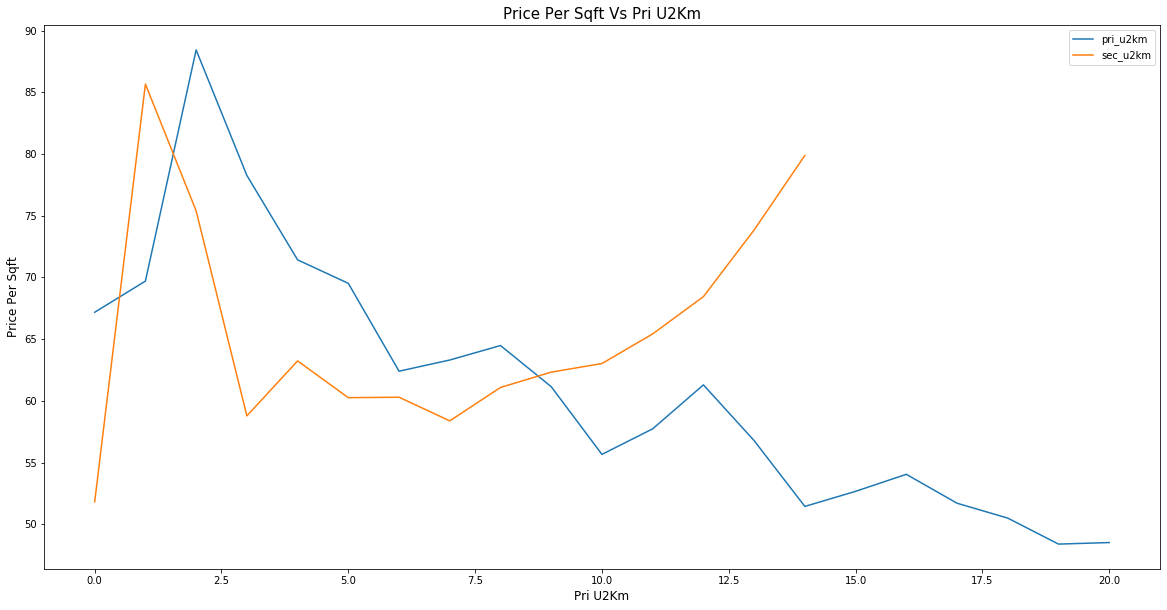

In [52]:
compound_line_plot(compound=1, x="pri_u2km", x_2="sec_u2km")

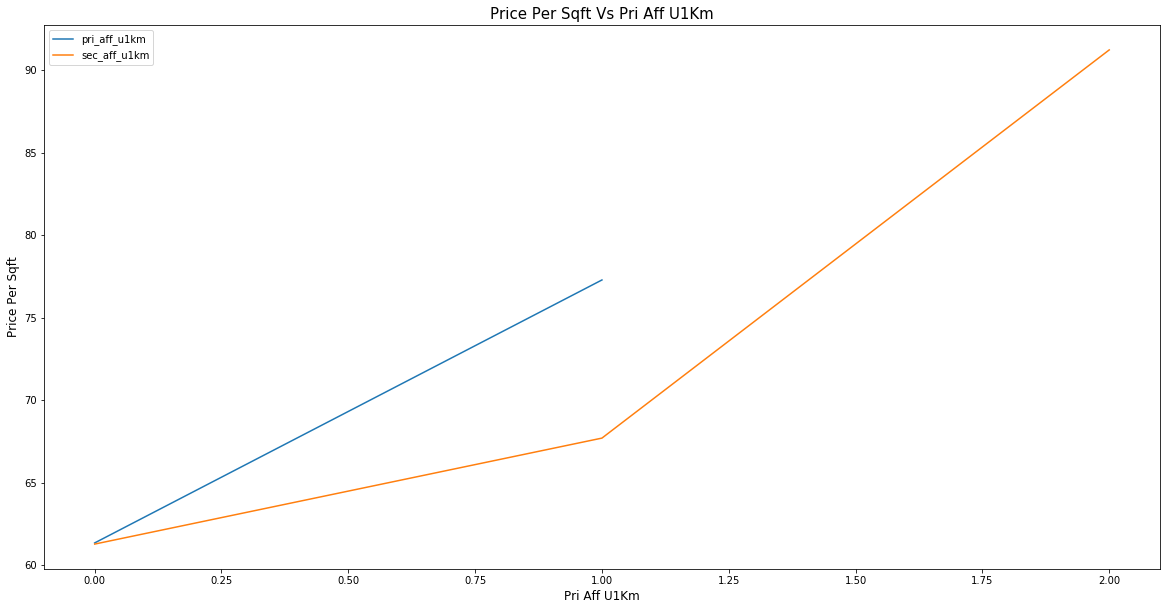

In [53]:
compound_line_plot(compound=1, x="pri_aff_u1km", x_2="sec_aff_u1km")

In [54]:
hdb[hdb["pri_aff_u1km"]==1]['town'].value_counts()

BISHAN         816
ANG MO KIO     790
BUKIT TIMAH     65
Name: town, dtype: int64

In [55]:
hdb[hdb["sec_aff_u1km"]==2]['town'].value_counts()

BISHAN    212
Name: town, dtype: int64

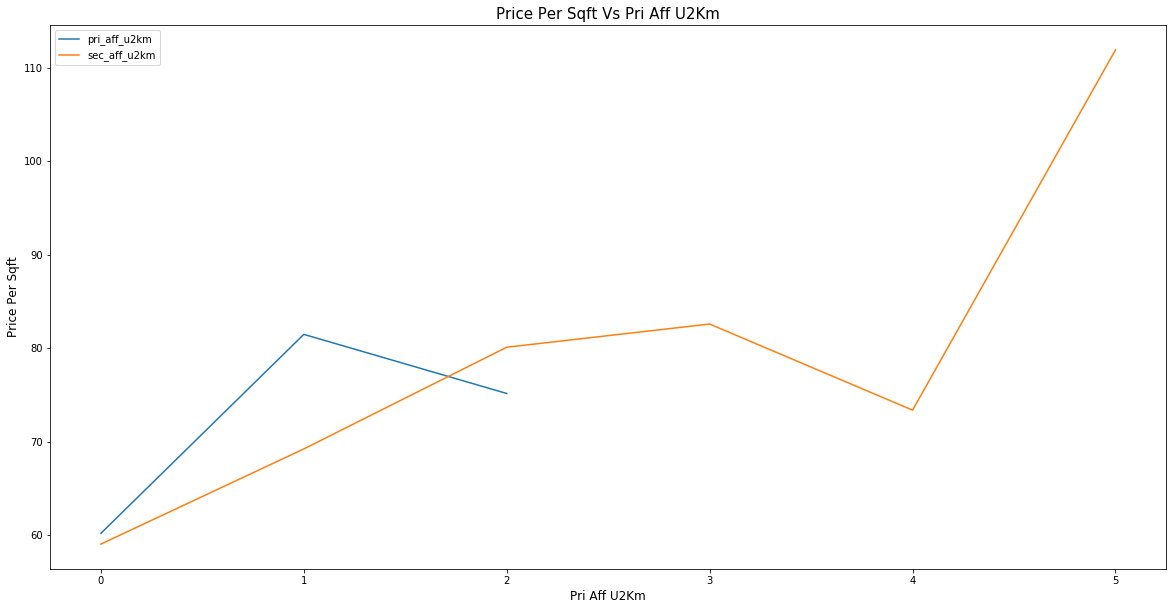

In [56]:
compound_line_plot(compound=1, x="pri_aff_u2km", x_2="sec_aff_u2km")

In [57]:
hdb[hdb["sec_aff_u2km"]==4]['town'].value_counts()

TOA PAYOH          38
KALLANG/WHAMPOA     2
Name: town, dtype: int64

In [58]:
hdb[hdb["sec_aff_u2km"]==4]['address'].value_counts()

173 LOR 1 TOA PAYOH     11
171 LOR 1 TOA PAYOH     10
174 LOR 1 TOA PAYOH      8
172 LOR 1 TOA PAYOH      5
172A LOR 1 TOA PAYOH     4
104 JLN DUSUN            2
Name: address, dtype: int64

In [59]:
columns = ['dist_to_highway', 'storey_range', 'remaining_lease', 'mrt_dist', 'sec_elite_u2km', 'price_per_sqft']

In [60]:
hdb[hdb["sec_aff_u2km"]==4].mean()[columns]

dist_to_highway     76.825000
storey_range         6.950000
remaining_lease     64.272500
mrt_dist           620.375000
sec_elite_u2km       5.000000
price_per_sqft      73.382714
dtype: float64

In [61]:
hdb[hdb["town"]=="TOA PAYOH"].mean()[columns]

dist_to_highway    572.548540
storey_range        10.715206
remaining_lease     66.703797
mrt_dist           603.482388
sec_elite_u2km       1.640893
price_per_sqft      80.611017
dtype: float64

In [62]:
hdb[(hdb["town"]=="TOA PAYOH") & (hdb["storey_range"]<=7)].mean()[columns]

dist_to_highway    551.820776
storey_range         3.705479
remaining_lease     62.080091
mrt_dist           623.042237
sec_elite_u2km       1.705479
price_per_sqft      75.811268
dtype: float64

In [63]:
hdb[hdb['address'].str.contains("KIM KEAT AVE")].mean()[columns]

dist_to_highway     137.861111
storey_range          6.500000
remaining_lease      59.929167
mrt_dist           1138.416667
sec_elite_u2km        1.000000
price_per_sqft       66.620623
dtype: float64

In [64]:
# Comparing to 3
hdb[hdb["sec_aff_u2km"]==3].mean()[columns]

dist_to_highway    1423.714724
storey_range          7.889571
remaining_lease      67.199141
mrt_dist           1032.153374
sec_elite_u2km        4.536810
price_per_sqft       82.593454
dtype: float64

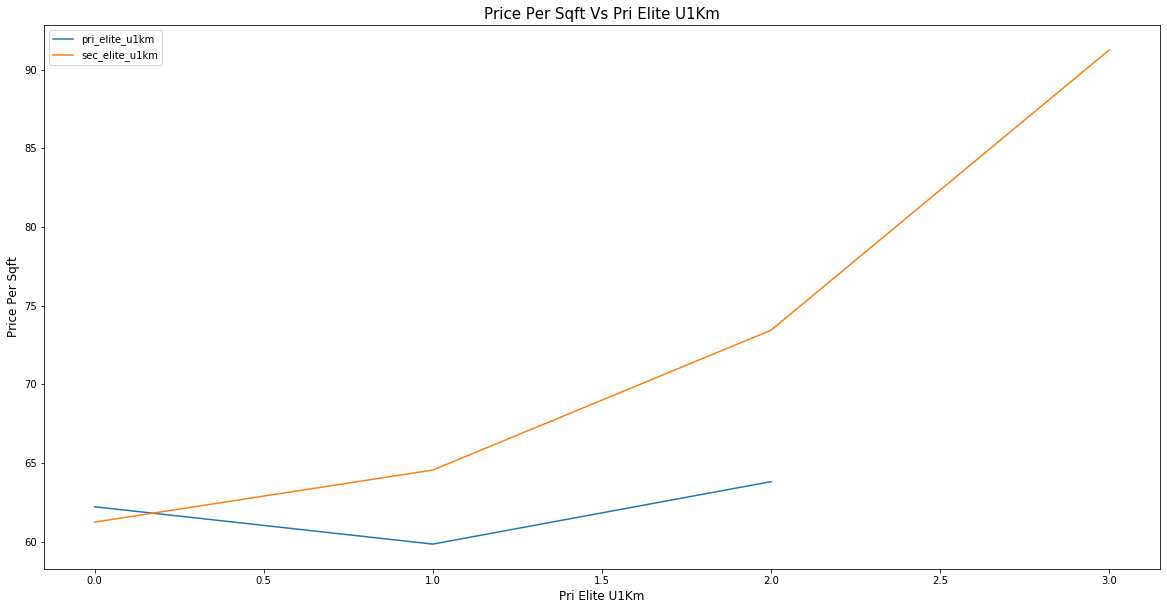

In [65]:
compound_line_plot(compound=1, x="pri_elite_u1km", x_2="sec_elite_u1km")

In [66]:
hdb[hdb["pri_elite_u1km"]==2]['town'].value_counts()

JURONG WEST    1340
BEDOK          1325
Name: town, dtype: int64

In [67]:
hdb[hdb["sec_elite_u1km"]==3]['town'].value_counts()

BISHAN    212
Name: town, dtype: int64

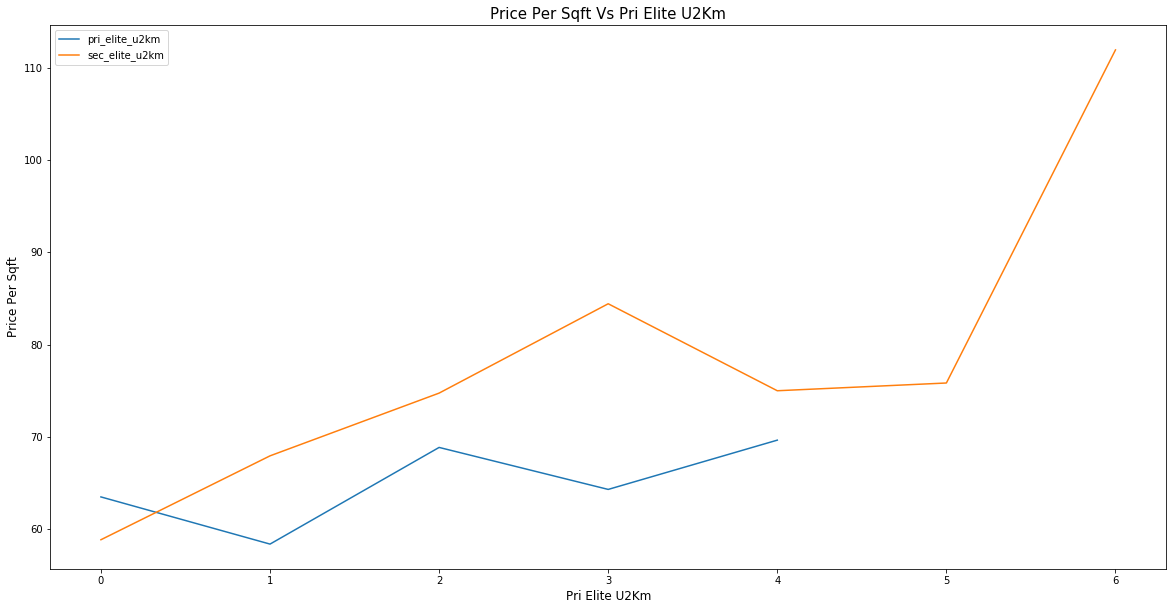

In [68]:
compound_line_plot(compound=1, x="pri_elite_u2km", x_2="sec_elite_u2km")

In [69]:
hdb[hdb["pri_elite_u2km"]==4]['town'].value_counts()

BEDOK    269
Name: town, dtype: int64

In [70]:
hdb[hdb["sec_elite_u2km"]==4]['town'].value_counts()

ANG MO KIO         931
BISHAN              58
KALLANG/WHAMPOA     11
Name: town, dtype: int64

In [71]:
# hdb.to_csv('./Dataset/Transitional/final_data.csv', index=False)

In [72]:
test_df = hdb.groupby('town').mean()[['resale_price', 'floor_area_sqm']]

In [73]:
test_df['per_sqft'] = (test_df['resale_price'] / test_df['floor_area_sqm'])

In [69]:
test_df['per_sqft'].sort_values()

town
CHOA CHU KANG      3471.842695
WOODLANDS          3550.812172
SEMBAWANG          3661.523006
JURONG WEST        3802.031163
YISHUN             3894.043170
BUKIT BATOK        3987.408531
PASIR RIS          4035.146585
BUKIT PANJANG      4134.201004
HOUGANG            4212.115096
JURONG EAST        4268.268453
SENGKANG           4366.529001
TAMPINES           4496.799764
BEDOK              4582.057091
PUNGGOL            4681.953322
SERANGOON          4785.140982
ANG MO KIO         4830.535440
GEYLANG            5146.259796
CLEMENTI           5473.775138
TOA PAYOH          5628.550255
KALLANG/WHAMPOA    5703.529306
BISHAN             5948.247733
MARINE PARADE      6057.056065
BUKIT TIMAH        6457.059759
BUKIT MERAH        6468.478500
QUEENSTOWN         6695.982989
CENTRAL AREA       7583.451635
Name: per_sqft, dtype: float64

In [70]:
test_df.shape

(26, 3)

In [71]:
hdb['sold_year'].value_counts(normalize=True)

2019    0.316515
2018    0.312036
2017    0.292551
2020    0.078897
Name: sold_year, dtype: float64

In [72]:
hdb.groupby('sold_year').mean()

storey_range  floor_area_sqm  lease_commence_date  remaining_lease  \
sold_year                                                                       
2017           8.659125       97.753001          1992.725096        74.695071   
2018           8.650880       98.575653          1993.571246        74.544538   
2019           8.517419       97.087043          1994.465185        74.450694   
2020           8.521244       96.674001          1995.961851        75.344265   

            resale_price  sold_month  latitude   longitude  \
sold_year                                                    
2017       443888.520571    6.763470  1.365875  103.839758   
2018       440617.794309    6.877577  1.368169  103.838368   
2019       432121.845222    6.768985  1.369069  103.836615   
2020       434451.092388    2.005786  1.370261  103.841108   

           raffles_place_dist  one_north_dist  jurong_east_dist  orchard_dist  \
sold_year                                                                       
2017                34.522020       42.984445         48.045224     36.990470   
2018                35.169927       43.215626         47.868123     37.453951   
2019                35.405746       43.383628         47.434810     37.610157   
2020                35.551287       44.040081         49.020749     37.652148   

           changi_dist  raffles_place_drive  one_north_drive  \
sold_year                                                      
2017         51.804799            24.985981        27.902968   
2018         52.648222            25.346486        28.093556   
2019         53.081216            25.534415        28.224107   
2020         52.485648            25.656529        28.753569   

           jurong_east_drive  orchard_drive  changi_drive    mrt_dist  \
sold_year                                                               
2017               27.261179      22.165249     32.359262  756.714467   
2018               27.313769      22.469174     32.671384  770.085211   
2019               27.255330      22.605223     33.024784  783.157781   
2020               28.057914      22.690532     32.493489  813.614175   

           near_bus_itc  near_mrt_itc  bus_u300m    bus_dist  mall_u1km  \
sold_year                                                                 
2017           0.138476      0.063533   5.961724  113.218684   1.777561   
2018           0.132023      0.060251   5.892251  114.973074   1.756617   
2019           0.126955      0.057551   5.839290  113.961152   1.714949   
2020           0.119508      0.048997   5.811427  116.048635   1.689568   

            mall_dist  pri_u1km  pri_u2km  pri_aff_u1km  pri_aff_u2km  \
sold_year                                                               
2017       653.378517  3.257545  8.843240      0.025452      0.098103   
2018       653.952320  3.284754  8.866606      0.023086      0.091931   
2019       661.040606  3.213574  8.750642      0.023390      0.094236   
2020       662.341168  3.146447  8.832942      0.022600      0.090219   

           pri_elite_u1km  pri_elite_u2km  sec_u1km  sec_u2km  sec_aff_u1km  \
sold_year                                                                     
2017             0.313716        0.817495  2.202009  6.327661      0.064118   
2018             0.307886        0.799954  2.214857  6.276480      0.059154   
2019             0.319528        0.801929  2.170129  6.288161      0.064356   
2020             0.304647        0.787561  2.099620  6.277165      0.056771   

           sec_aff_u2km  sec_elite_u1km  sec_elite_u2km  dist_to_highway  \
sold_year                                                                  
2017           0.281389        0.096007        0.393193      1017.273148   
2018           0.257234        0.087543        0.359589      1024.620891   
2019           0.263689        0.093019        0.370183      1073.378611   
2020           0.235400        0.085518        0.336648      1071.692461   

           dist_to

In [73]:
hdb.groupby('flat_type').describe()['floor_area_sqm'][['min', 'max']]

min    max
flat_type                     
1 ROOM             31.0   31.0
2 ROOM             34.0   60.0
3 ROOM             51.0  249.0
4 ROOM             70.0  135.0
5 ROOM             99.0  160.0
EXECUTIVE         124.0  215.0
MULTI-GENERATION  132.0  179.0

In [3]:
import pandas as pd
import folium

In [4]:
hdb = pd.read_csv('./Dataset/Transitional/complete_data_with_ec.csv')
mrt = pd.read_csv('./Dataset/Engineered/MRT.csv')
bus = pd.read_csv('./Dataset/Engineered/Bus_Stop.csv')
pri = pd.read_csv('./Dataset/Engineered/Primary_School.csv')
sec = pd.read_csv('./Dataset/Engineered/Secondary_School.csv')
spm = pd.read_csv('./Dataset/Engineered/Mall.csv')

In [6]:
pri.loc[0:19, 'elite'] = 1
sec.loc[0:19, 'elite'] = 1

In [7]:
pri_elite = pri[pri['elite']==1][['name', 'latitude', 'longitude']]
sec_elite = sec[sec['elite']==1][['name', 'latitude', 'longitude']]
total_elite = pd.concat([pri_elite, sec_elite])

In [11]:
hex_df = pd.read_csv('./Dataset/final_data_with_hex.csv')

In [12]:
hexmap = folium.Map(location=[1.35, 103.8], zoom_start=11)

folium.Choropleth(
    geo_data='./Dataset/Spatial/planning_area_optimized.geojson',
    fill_color='RdYlGn', 
    fill_opacity=0,
    line_weight=2,
    line_opacity=1,
    nan_fill_color='white',
    nan_fill_opacity=0
).add_to(hexmap)

folium.Choropleth(
    geo_data='./Dataset/Spatial/hexmap.geojson',
    data=hex_df,
    columns=['hex_id', 'appeal_score'],
    key_on='feature.properties.hex_id',
    fill_color='RdYlGn', 
    fill_opacity=0.6, 
    line_opacity=0.4,
    legend_name='Regional Value Score',
    nan_fill_color='white',
    nan_fill_opacity=0
).add_to(hexmap)

for name, lat, lon in zip(total_elite['name'], total_elite['latitude'], total_elite['longitude']):
    label = folium.Popup(name, parse_html=True, max_width=450)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color='black',
        weight=1.6,
        fill=True,
        fill_color='white',
        fill_opacity=0.7).add_to(hexmap)
    
for name, lat, lon in zip(mrt['Name'], mrt['Latitude'], mrt['Longitude']):
    label = folium.Popup(name + ' MRT', parse_html=True, max_width=450)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        weight=1.6,
        fill=True,
        fill_color='white',
        fill_opacity=0.7).add_to(hexmap)

hexmap

In [13]:
import folium

hexmap = folium.Map(location=[1.35, 103.8], zoom_start=11)

folium.Choropleth(
    geo_data='./Dataset/Spatial/planning_area_optimized.geojson',
    fill_color='RdYlGn', 
    fill_opacity=0,
    line_weight=2,
    line_opacity=1,
    nan_fill_color='white',
    nan_fill_opacity=0
).add_to(hexmap)

folium.Choropleth(
    geo_data='./Dataset/Spatial/hexmap.geojson',
    data=hex_df,
    columns=['hex_id', 'resale_price'],
    key_on='feature.properties.hex_id',
    fill_color='RdYlGn', 
    fill_opacity=0.6, 
    line_opacity=0.4,
    legend_name='Resale Price',
    nan_fill_color='white',
    nan_fill_opacity=0
).add_to(hexmap)

for name, lat, lon in zip(total_elite['name'], total_elite['latitude'], total_elite['longitude']):
    label = folium.Popup(name, parse_html=True, max_width=450)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color='black',
        weight=1.6,
        fill=True,
        fill_color='white',
        fill_opacity=0.7).add_to(hexmap)
    
for name, lat, lon in zip(mrt['Name'], mrt['Latitude'], mrt['Longitude']):
    label = folium.Popup(name + ' MRT', parse_html=True, max_width=450)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color='red',
        weight=1.6,
        fill=True,
        fill_color='white',
        fill_opacity=0.7).add_to(hexmap)

hexmap

In [16]:
def plot_toner_map(column, legend_name='None'):
    import folium

    hexmap = folium.Map(location=[1.36, 103.83], zoom_start=12, tiles='stamen toner')

    folium.Choropleth(
        geo_data='./Dataset/Spatial/hexmap.geojson',
        data=hex_df,
        columns=['hex_id', column],
        key_on='feature.properties.hex_id',
        fill_color='RdYlGn', 
        fill_opacity=0.7, 
        line_opacity=1,
        line_weight=0.3,
        legend_name=legend_name,
        nan_fill_color='white',
        nan_fill_opacity=0
    ).add_to(hexmap)

    return hexmap

In [17]:
plot_toner_map('unit_price', legend_name='unit_price')

In [18]:
hdb['flat_type'].value_counts(normalize=True) * 100

4 ROOM              41.555403
5 ROOM              24.793164
3 ROOM              24.111320
EXECUTIVE            7.962456
2 ROOM               1.484937
MULTI-GENERATION     0.047073
1 ROOM               0.045646
Name: flat_type, dtype: float64